In [5]:
import matplotlib.pyplot as plt
from matplotlib import style

#style.use('fivethirtyeight')
import numpy as np
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)

In [6]:
X = np.linspace(-5, 5, num=20)
X0 = X * np.random.rand(len(X)) + 15  # Create data cluster 1
print('X0:')
print(X0)
X1 = X * np.random.rand(len(X)) - 15  # Create data cluster 2
print('X1:')
print(X1)
X2 = X * np.random.rand(len(X))  # Create data cluster 3
print('X2:')
print(X2)
X_tot = np.stack((X0, X1, X2)).flatten()  # Combine the clusters to get the random datapoints from above

X0:
[12.25593248 11.80046862 12.62067088 13.13592595 13.77363084 13.47025078
 14.1939183  13.82661447 14.23921361 14.89909434 15.20834869 15.41754862
 15.74742705 16.70504644 15.1682433  15.25221639 15.0691682  18.28665729
 18.48122757 19.35006074]
X1:
[-19.89309171 -18.57518305 -16.82162906 -17.67023139 -15.34237334
 -16.51560242 -15.26407185 -16.24298542 -15.41198552 -15.10912156
 -14.9303801  -14.38876288 -14.39980219 -13.95288483 -14.95549784
 -13.21210777 -12.90598832 -12.56473422 -10.77796912 -11.5908985 ]
X2:
[-1.7975395  -1.95514295 -2.75380735 -0.20603451 -1.93011418 -1.58835285
 -0.38754682 -0.16963987 -0.24902238 -0.09571336  0.15005178  0.34626435
  1.30049189  0.18797728  0.49470811  0.4669486   2.23431796  0.99983527
  2.08612714  1.22212796]


In [7]:
class GM1D:

    def __init__(self, X, iterations):
        self.iterations = iterations
        self.X = X
        self.mu = None
        self.pi = None
        self.var = None

    def run(self):

        """
        Instantiate the random mu, pi and var
        """
        self.mu = [-2,0,2]
        self.pi = [1 / 3, 1 / 3, 1 / 3]
        self.var = [9,9,9]

        for iter in range(self.iterations):


            """
            E-Step            
            Probability for each datapoint x_i to belong to gaussian g
                These are the probabilistic class assignments (latent variables)
            """

            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(X_tot), 3))

            """
            Compute the likelihood for each datapoint x_i to belong to gaussian g
            """
            for c, g, p in zip(range(3), [norm(loc=self.mu[0], scale=np.sqrt(self.var[0])),
                                          norm(loc=self.mu[1], scale=np.sqrt(self.var[1])),
                                          norm(loc=self.mu[2], scale=np.sqrt(self.var[2]))], self.pi):
                r[:, c] = p * g.pdf(X_tot)  # Write the probability that x belongs to gaussian c in column c.
                # Therewith we get a 60x3 array filled with the probability that each x_i belongs to one of the gaussians
            """
            Normalize the likelihoods to get probabilities such that each row of r sums to 1 and 
            weight it by mu_c == the fraction of points belonging to cluster c
            """
            for i in range(len(r)):
                r[i] = r[i] / (np.sum(self.pi) * np.sum(r, axis=1)[i])

            """Plot the data"""
            fig = plt.figure(figsize=(8, 5))
            ax0 = fig.add_subplot(111)
            for i in range(len(r)):
                ax0.scatter(self.X[i], 0, c=np.array([r[i][0], r[i][1], r[i][2]]), s=100)

            """Plot the gaussians"""
            for g, c in zip([norm(loc=self.mu[0], scale=np.sqrt(self.var[0])).pdf(np.linspace(-20, 20, num=60)),
                             norm(loc=self.mu[1], scale=np.sqrt(self.var[1])).pdf(np.linspace(-20, 20, num=60)),
                             norm(loc=self.mu[2], scale=np.sqrt(self.var[2])).pdf(np.linspace(-20, 20, num=60))],
                            ['r', 'g', 'b']):
                ax0.plot(np.linspace(-20, 20, num=60), np.ndarray.flatten(g), c=c)

            """
            M-Step            
            Compute class means and covariances that maximize the likelihoods.
            """

            """calculate m_c"""
            m_c = []
            for c in range(len(r[0])):
                m = np.sum(r[:, c])
                m_c.append(m)  # For each cluster c, calculate the m_c and add it to the list m_c

            """calculate pi_c"""
            for k in range(len(m_c)):
                self.pi[k] = (m_c[k] / np.sum(
                    m_c))  # For each cluster c, calculate the fraction of points pi_c which belongs to cluster c

            """calculate mu_c"""
            self.mu = np.sum(self.X.reshape(len(self.X), 1) * r, axis=0) / m_c

            """calculate var_c"""
            var_c = []

            for c in range(len(r[0])):
                var_c.append((1 / m_c[c]) * np.dot(
                    ((np.array(r[:, c]).reshape(60, 1)) * (self.X.reshape(len(self.X), 1) - self.mu[c])).T,
                    (self.X.reshape(len(self.X), 1) - self.mu[c])))
            self.var = var_c

            plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

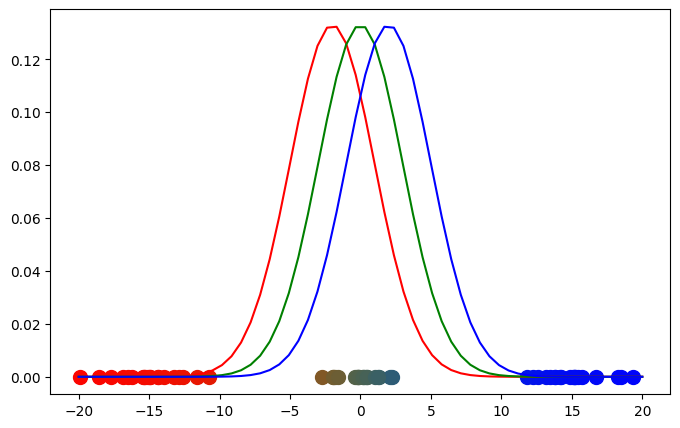

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

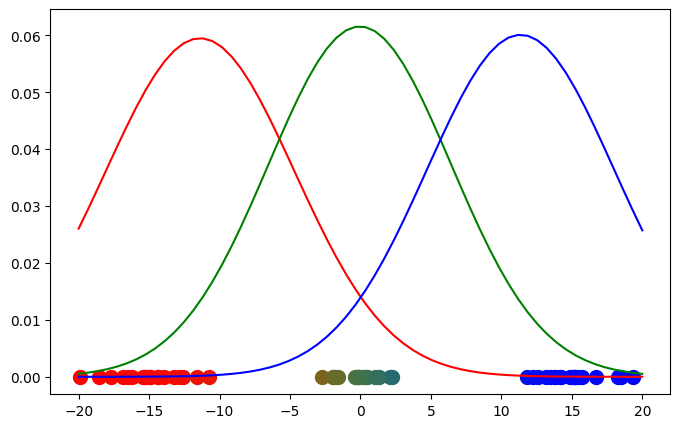

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

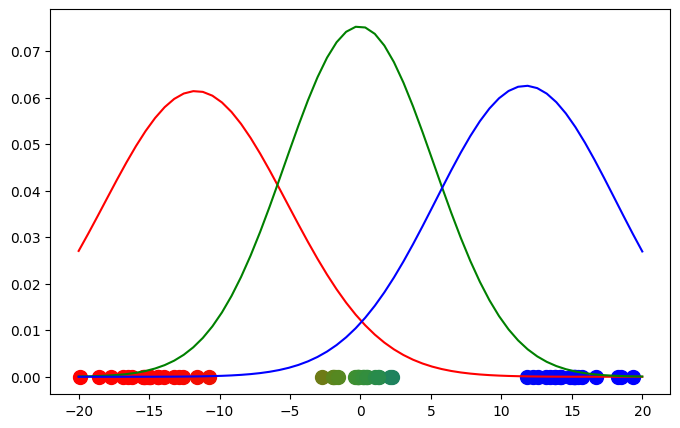

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

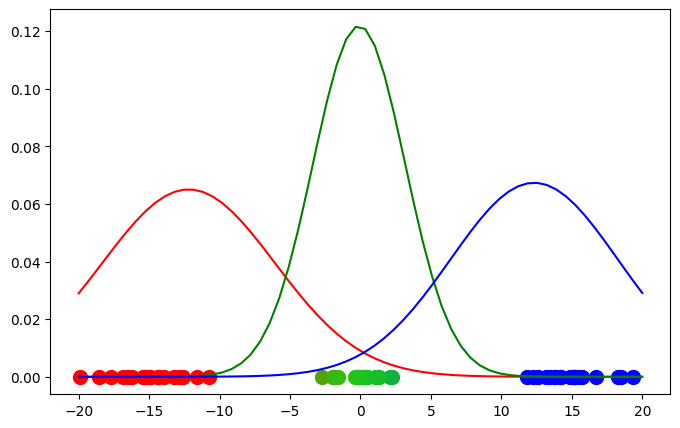

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

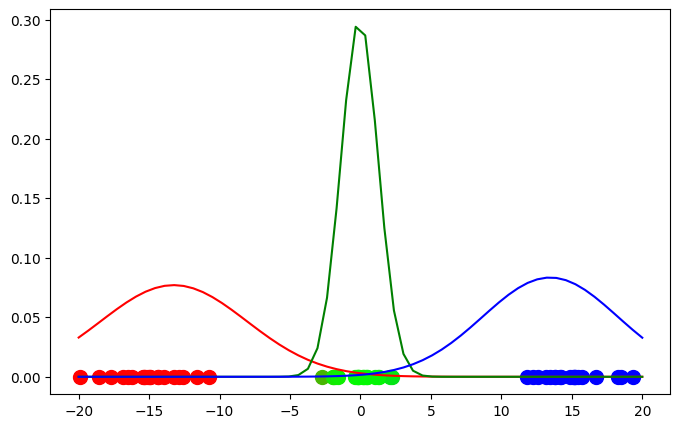

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

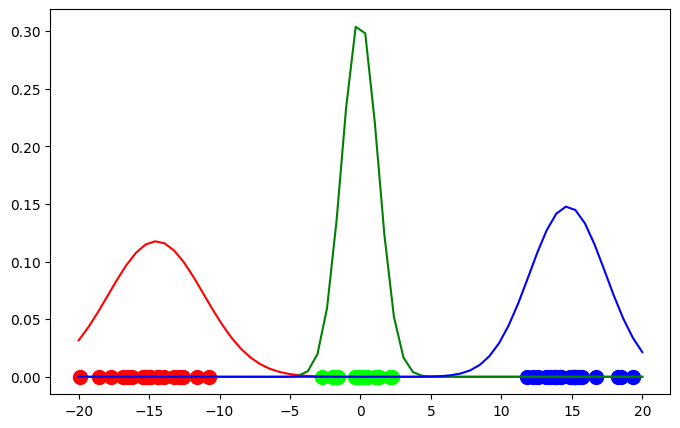

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

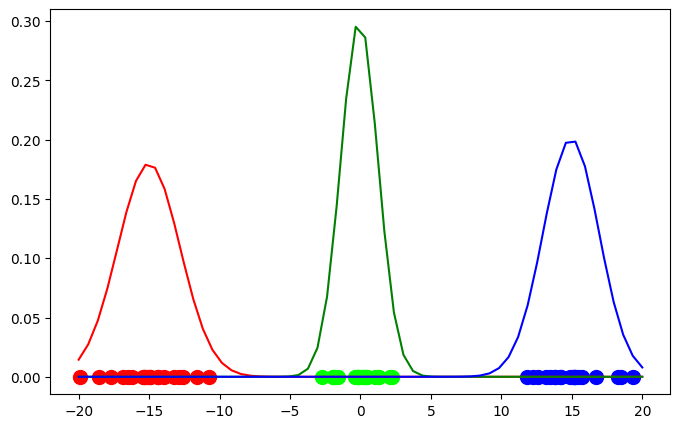

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

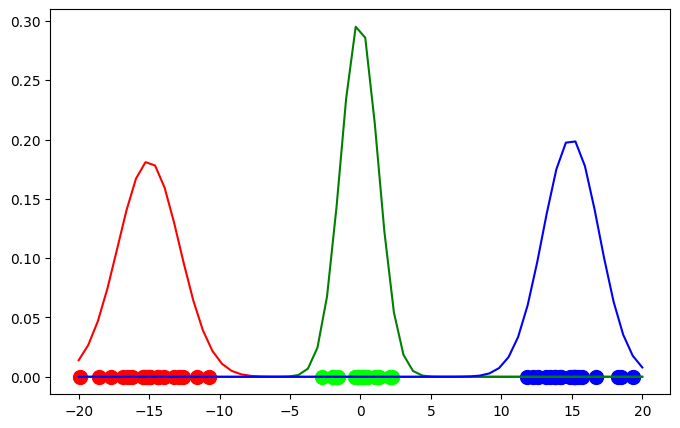

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

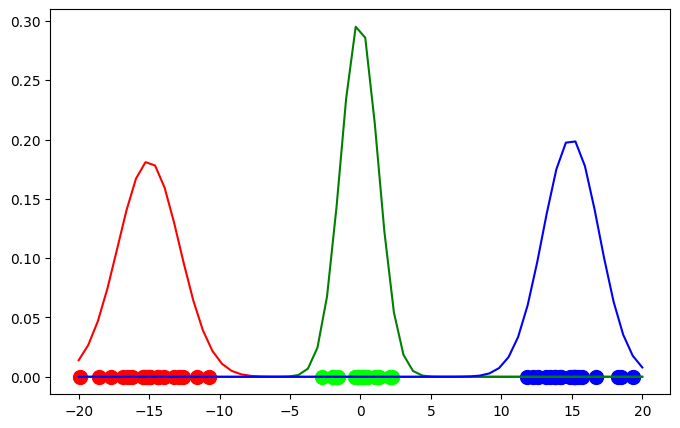

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

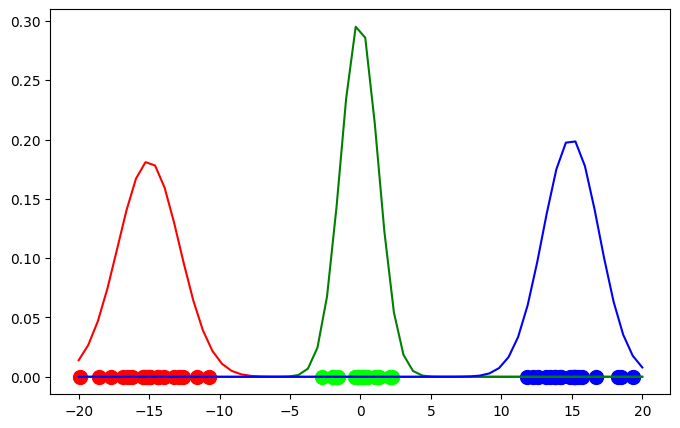

pause


In [8]:

GM1D = GM1D(X_tot, 10)
GM1D.run()
print('pause')